In [72]:
#X=before2009[['CreditScore','BankCardUse','IncomeRange','DebtToIncomeRatio','DelinquenciesLast7Years','EmploymentStatusDuration','CreditGrade','CustomerClarify','BorrowerRate','IsBorrowerHomeowner','ListingCategory (numeric)','InquiriesLast6Months']]
import pandas as pd
import numpy as np
loanData=pd.read_csv('D:/kaggle/prosper/prosperLoanData.csv')
loanData.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,2009/8/14 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,2009/12/17 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [73]:
loanData.groupby(['LoanStatus'])['LoanStatus'].count()

LoanStatus
Cancelled                     5
Chargedoff                11992
Completed                 38074
Current                   56576
Defaulted                  5018
FinalPaymentInProgress      205
Past Due (1-15 days)        806
Past Due (16-30 days)       265
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [74]:
def loan_status(s):
    if s=='Cancelled':
        d='Cancelled'
    elif s=='Chargedoff':
        d='Defaulted'
    elif s=='Defaulted':
        d='Defaulted'
    elif s=='Current':
        d='Current'
    else:
        d='Completed'
    return d

loanData['Status']=loanData['LoanStatus'].apply(loan_status)
loanData=loanData[loanData['Status']!='Cancelled']


loanData['CreditScore']=((loanData['CreditScoreRangeLower']+loanData['CreditScoreRangeUpper'])/2).round(0)

#groupby就是要画图了，这句话画图前面要加上
loanData1=loanData[loanData['Status']!='Current']
creditscore=loanData1.groupby(['Status','CreditScore'])['CreditScore'].count().unstack(0)      #butong
creditscore

Status,Completed,Defaulted
CreditScore,,
10.0,39.0,94.0
370.0,NaN,1.0
430.0,1.0,4.0
450.0,4.0,32.0
470.0,33.0,108.0
490.0,93.0,253.0
510.0,203.0,350.0
530.0,649.0,943.0
550.0,690.0,784.0


Status       Completed  Defaulted
CreditScore                      
430.0              1.0        4.0
450.0              4.0       32.0
470.0             33.0      108.0
490.0             93.0      253.0
510.0            203.0      350.0
530.0            649.0      943.0
550.0            690.0      784.0
570.0            700.0      657.0
590.0            608.0      517.0
610.0           1920.0     1290.0
630.0           2250.0     1266.0
650.0           4425.0     2136.0
670.0           4639.0     1855.0
690.0           4701.0     1824.0
710.0           4205.0     1506.0
730.0           4048.0     1183.0
750.0           3342.0      830.0
770.0           2728.0      608.0
790.0           2011.0      339.0
810.0           1285.0      163.0
830.0            803.0       69.0
850.0            367.0       15.0
870.0            164.0        9.0
890.0             22.0        NaN


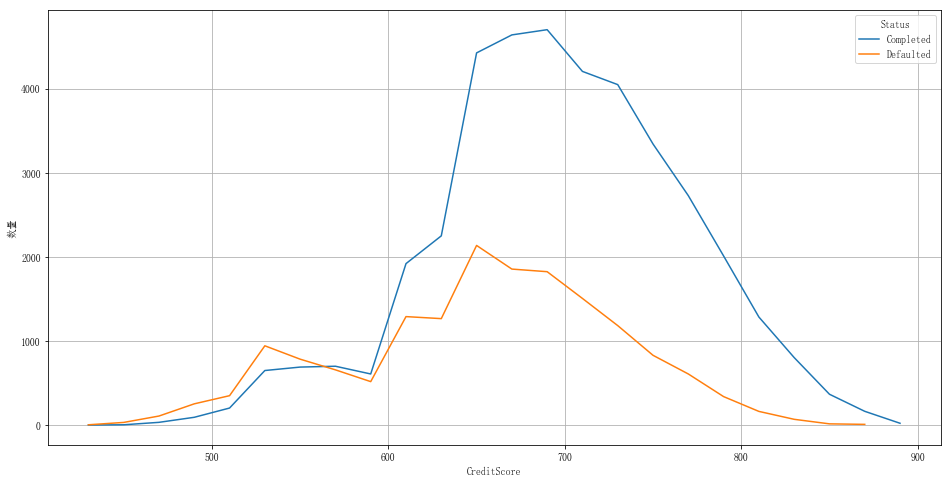

In [75]:
#buneng用drop，不是典型意义上的df
creditscore1=pd.DataFrame(creditscore.values[2:],index=creditscore.index[2:],columns=creditscore.columns)
print(creditscore1)
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['FangSong']    # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(111)
ax1.set_ylabel('数量')

creditscore1.plot(kind='line',ax=ax1,grid=True)
plt.show()

0.31
0.6
Status       Completed  Defaulted
BankCardUse                      
Mild Use          8515       2269
Medium Use        8023       2586
Heavy Use        15384       6479
Super Use          723        737
No Use            7701       4939
BankCardUse
Mild Use      0.210404
Medium Use    0.243755
Heavy Use     0.296345
Super Use     0.504795
No Use        0.390744
dtype: float64


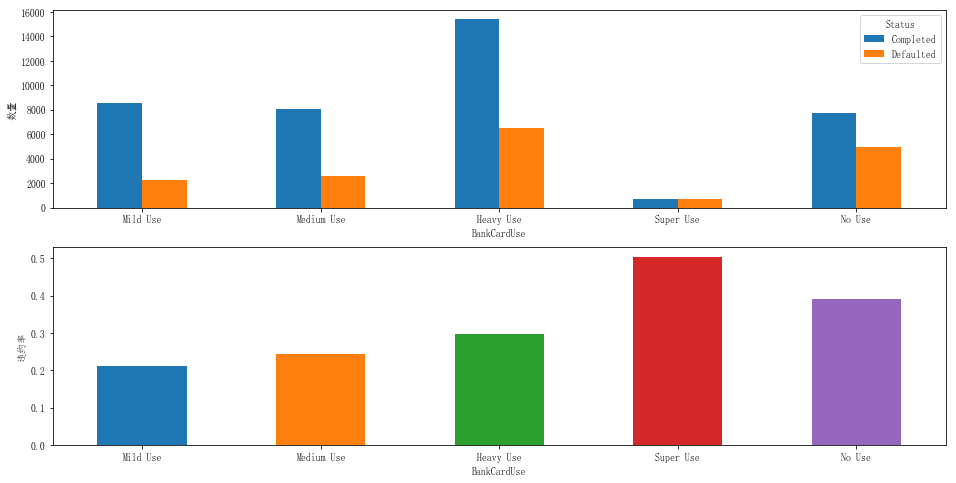

In [76]:
def Bankcard_Utilization(s,onefourth=0.31,twofourth=0.6):
    if (s>0)&(s<=onefourth):
        d='Mild Use'
    elif (s>onefourth) & (s<=twofourth):
        d='Medium Use'
    elif (s>twofourth) & (s<=1):
        d='Heavy Use'
    elif s>1:
        d='Super Use'
    else:
        d='No Use'
    return d

onefourth=loanData['BankcardUtilization'].quantile(0.25)
print(onefourth)
twofourth=loanData['BankcardUtilization'].quantile(0.5)
print(twofourth)
loanData['BankCardUse']=loanData['BankcardUtilization'].apply(Bankcard_Utilization)

loanData1=loanData[loanData['Status']!='Current']
bankcarduse=loanData1.groupby(['Status','BankCardUse'])['BankCardUse'].count().unstack(0)
index=['Mild Use','Medium Use', 'Heavy Use', 'Super Use', 'No Use',]
bankcarduse=bankcarduse.reindex(index)
print(bankcarduse)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
bankcarduse.plot(kind='bar',ax=ax1)
ax1.set_xticklabels(index,rotation=0)
ax1.set_ylabel('数量')

defaultedrate=bankcarduse['Defaulted']/(bankcarduse['Defaulted']+bankcarduse['Completed'])
print(defaultedrate)

ax2=fig.add_subplot(212)
defaultedrate.plot(kind='bar',ax=ax2)

ax2.set_ylabel('违约率')
ax2.set_xticklabels(index,rotation=0)
plt.show()

In [77]:
loanData.groupby(['IncomeRange'])['IncomeRange'].count()

IncomeRange
$0                  621
$1-24,999          7274
$100,000+         17337
$25,000-49,999    32191
$50,000-74,999    31050
$75,000-99,999    16916
Not displayed      7737
Not employed        806
Name: IncomeRange, dtype: int64

IncomeRange
Not displayed     0.404162
Not employed      0.370968
$0                0.386885
$1-24,999         0.350992
$25,000-49,999    0.319204
$50,000-74,999    0.261035
$75,000-99,999    0.225468
$100,000+         0.200903
dtype: float64


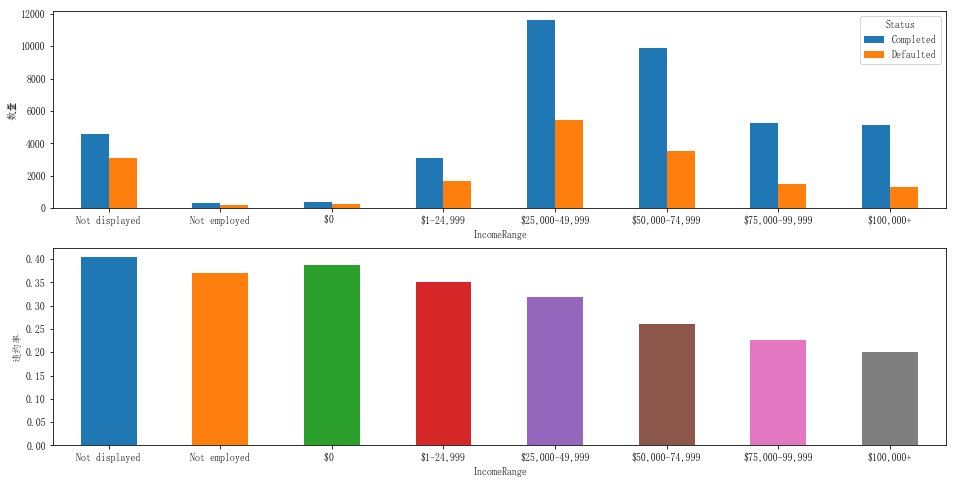

In [78]:
loanData1=loanData[loanData['Status']!='Current']
incomerange=loanData1.groupby(['Status','IncomeRange'])['IncomeRange'].count().unstack(0)
index=['Not displayed','Not employed','$0 ', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
incomerange=incomerange.reindex(index)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
incomerange.plot(kind='bar',ax=ax1)
ax1.set_xticklabels(index,rotation=0)
ax1.set_ylabel('数量')

defaultedrate=incomerange['Defaulted']/(incomerange['Defaulted']+incomerange['Completed'])
print(defaultedrate)
ax2=fig.add_subplot(212)
defaultedrate.plot(kind='bar',ax=ax2)
ax2.set_xticklabels(index,rotation=0)
ax2.set_ylabel('违约率')
plt.show()

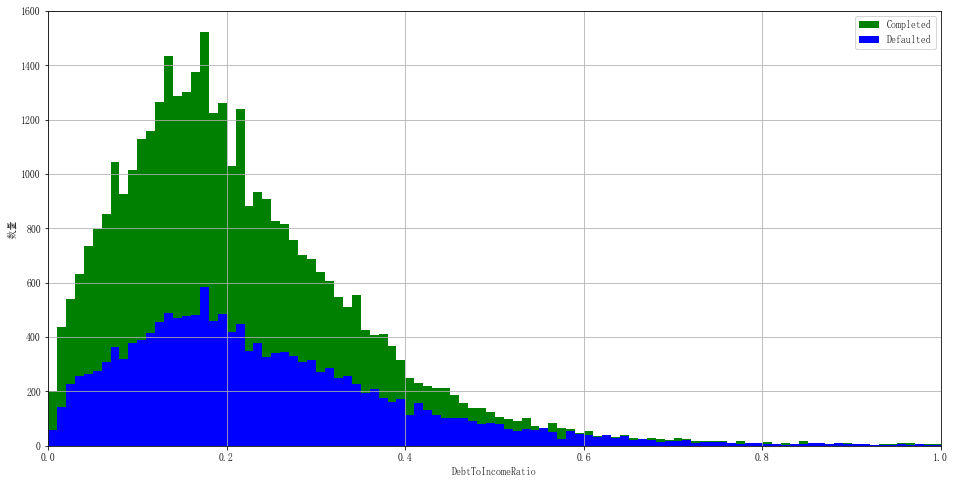

In [79]:
loanData1=loanData[loanData['Status']!='Current']
defaultedratio=loanData1[loanData1['Status']=='Defaulted']['DebtToIncomeRatio']
completedratio=loanData1[loanData1['Status']=='Completed']['DebtToIncomeRatio']

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(111)
ax1.set_xlim([0,1])
#绿色先画，再画上蓝色就看得见。如果是两个直方图叠加在一起，就要用hist里label+legend
completedratio.hist(bins=1000,color='g',label='Completed')
defaultedratio.hist(bins=1000,color='b',label='Defaulted')
plt.legend(loc='best')
ax1.set_xlabel('DebtToIncomeRatio')
ax1.set_ylabel('数量')
plt.show()

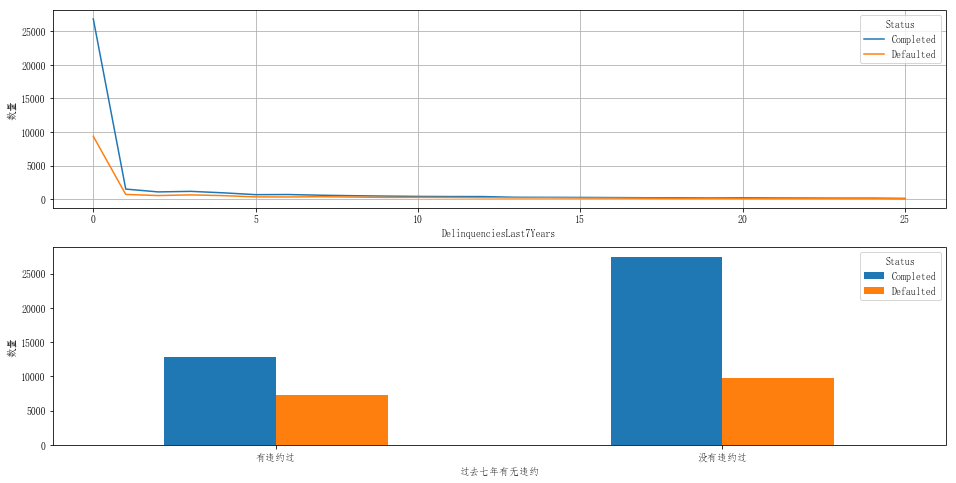

In [80]:
loanData1=loanData[loanData['Status']!='Current']
delinquencieslast7years=loanData1.groupby(['Status','DelinquenciesLast7Years'])['DelinquenciesLast7Years'].count().unstack(0)
delinquencieslast7years26=pd.DataFrame(delinquencieslast7years.values[0:26],index=delinquencieslast7years.index[0:26],columns=delinquencieslast7years.columns)

def Delinquencies_Last7Years(s):
    if s>0:
        d='有违约过'
    else:
        d='没有违约过'
    return d
loanData['DelinquenciesLast7Yearsyesorno']=loanData['DelinquenciesLast7Years'].apply(Delinquencies_Last7Years)
loanData1=loanData[loanData['Status']!='Current']
delinquencieslast7yearsyesorno=loanData1.groupby(['Status','DelinquenciesLast7Yearsyesorno'])['DelinquenciesLast7Yearsyesorno'].count().unstack(0)



fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
delinquencieslast7years26.plot(kind='line',ax=ax1,grid=True)
ax1.set_ylabel('数量')


ax2=fig.add_subplot(212)
delinquencieslast7yearsyesorno.plot(kind='bar',ax=ax2)
ax2.set_ylabel('数量')
ax2.set_xticklabels(['有违约过','没有违约过'],rotation=0)
ax2.set_xlabel('过去七年有无违约')
plt.show()

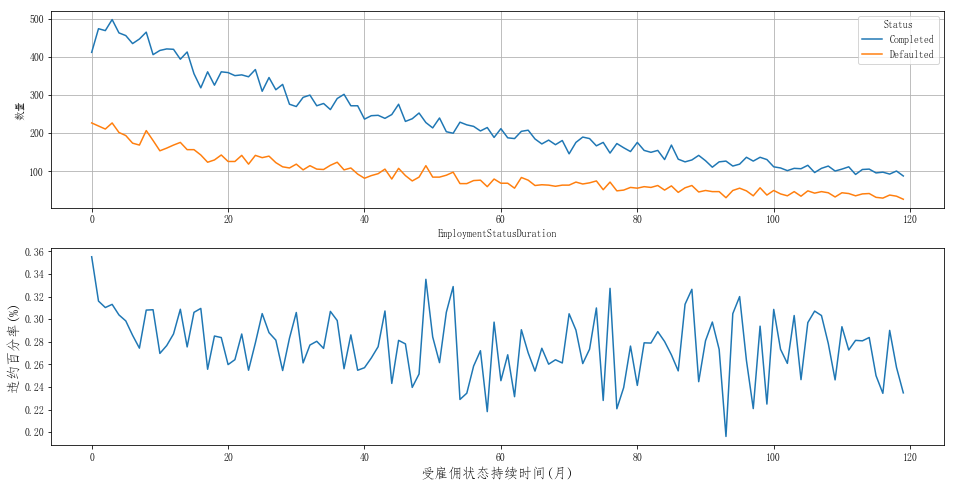

In [81]:
#480ge月太多了，取120个月，10年
loanData1=loanData[loanData['Status']!='Current']
employmentstatusduration=loanData1.groupby(['Status','EmploymentStatusDuration'])['EmploymentStatusDuration'].count().unstack(0)
employmentstatusduration120=pd.DataFrame(employmentstatusduration.values[0:120],index=employmentstatusduration.index[0:120],columns=employmentstatusduration.columns)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
employmentstatusduration120.plot(kind='line',ax=ax1,grid=True)
ax1.set_ylabel('数量')


defaultedrate=employmentstatusduration120['Defaulted']/(employmentstatusduration120['Defaulted']+employmentstatusduration120['Completed'])
ax2=fig.add_subplot(212)
defaultedrate.plot(kind='line',ax=ax2)
ax2.set_xlabel('受雇佣状态持续时间(月)', fontsize=14)
ax2.set_ylabel('违约百分率(%)', fontsize=14)
plt.show()

Status       Completed  Defaulted
CreditGrade                      
NC                  42         99
HR                1372       2133
E                 1678       1611
D                 3126       2027
C                 3609       2039
B                 2987       1402
A                 2505        809
AA                2969        540
CreditGrade
NC    0.702128
HR    0.608559
E     0.489815
D     0.393363
C     0.361013
B     0.319435
A     0.244116
AA    0.153890
dtype: float64


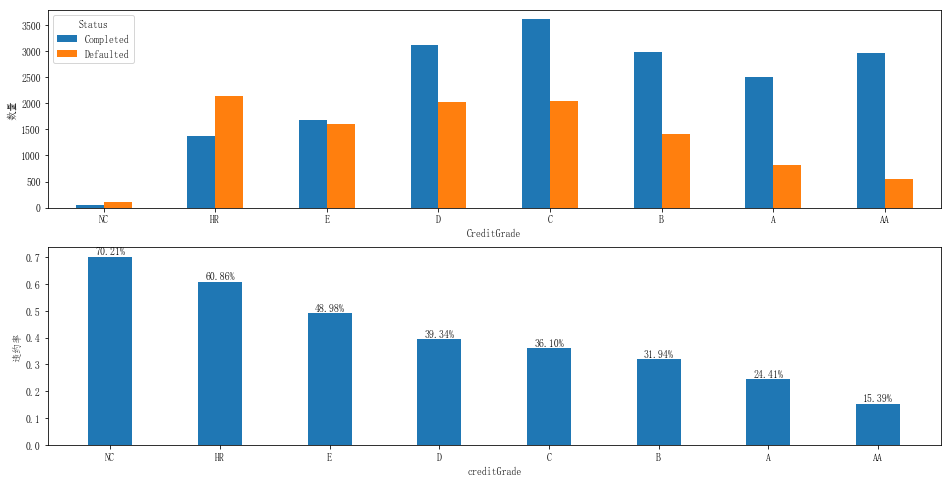

In [82]:
loanData1=loanData[loanData['Status']!='Current']

creditGrade=loanData1.groupby(['Status','CreditGrade'])['Status'].count().unstack(0)
index=[ 'NC','HR','E','D', 'C','B', 'A', 'AA']
creditGrade=creditGrade.reindex(index)
print(creditGrade)
fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
creditGrade.plot(kind='bar',ax=ax1)
ax1.set_xticklabels(index,rotation=0)
ax1.set_ylabel('数量')

defaultedRate=creditGrade['Defaulted']/(creditGrade['Defaulted']+creditGrade['Completed']).reindex(index)
print(defaultedRate)
y=list(defaultedRate.values)
x=np.arange(len(index))+1
ax2=fig.add_subplot(212)
ax2.bar(x,y,width=0.4)
ax2.set_xticks(x)
ax2.set_xticklabels(index)
ax2.set_ylabel('违约率')
ax2.set_xlabel('creditGrade')
for a, b in zip(x, y):
        plt.text(a, b + 0.001, '%.2f%%' % (b * 100), ha='center', va='bottom')
plt.show()

Status                 Completed  Defaulted
ProsperRating (Alpha)                      
HR                          2611       1424
E                           2913       1324
D                           4677       1677
C                           3504        840
B                           3102        588
A                           3391        405
AA                          1738         83
ProsperRating (Alpha)
HR    0.352912
E     0.312485
D     0.263928
C     0.193370
B     0.159350
A     0.106691
AA    0.045579
dtype: float64


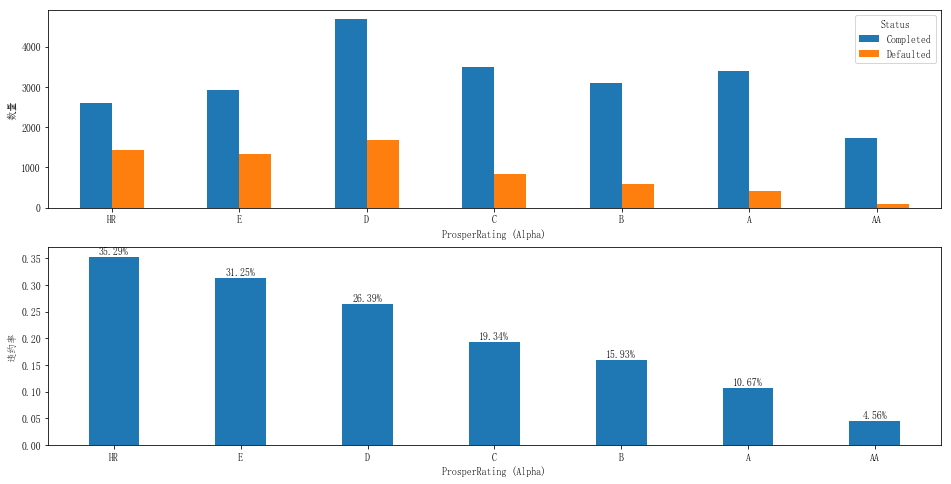

In [83]:
loanData1=loanData[loanData['Status']!='Current']

ProsperRating=loanData1.groupby(['Status','ProsperRating (Alpha)'])['Status'].count().unstack(0)
index=[ 'HR','E','D','C','B',  'A', 'AA']
ProsperRating=ProsperRating.reindex(index)
print(ProsperRating)
fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
ProsperRating.plot(kind='bar',ax=ax1)
ax1.set_xticklabels(index,rotation=0)
ax1.set_ylabel('数量')

defaultedRate=ProsperRating['Defaulted']/(ProsperRating['Defaulted']+ProsperRating['Completed'])
print(defaultedRate)
x=np.arange(len(index))+1
y=list(defaultedRate.values)
ax2=fig.add_subplot(212)
ax2.bar(x,y,width=0.4)
ax2.set_xticks(x)
ax2.set_xticklabels(index,rotation=0)
ax2.set_ylabel('违约率')
ax2.set_xlabel('ProsperRating (Alpha)')
for a, b in zip(x, y):
        plt.text(a, b + 0.001, '%.2f%%' % (b * 100), ha='center', va='bottom')

plt.show()

Status             Completed  Defaulted
CustomerClarify                        
New Borrower           31596      14556
Previous Borrower       8750       2454


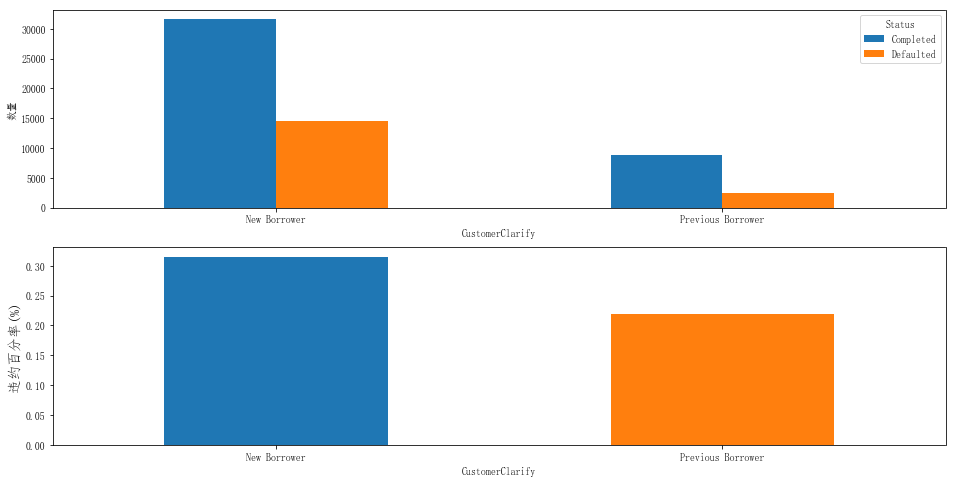

In [84]:
#CustomerClarify不用分析，要转化
def TotalProsper_Loans(s):
    if s>0:
        d='Previous Borrower'
    else:
        d='New Borrower'
    
    return d
loanData['CustomerClarify']=loanData['TotalProsperLoans'].apply(TotalProsper_Loans)
loanData1=loanData[loanData['Status']!='Current']
customerclarify=loanData1.groupby(['Status','CustomerClarify'])['CustomerClarify'].count().unstack(0)
print(customerclarify)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
customerclarify.plot(kind='bar',ax=ax1)
ax1.set_xticklabels(['New Borrower','Previous Borrower'],rotation=0)
ax1.set_ylabel('数量')

defaultedrate=customerclarify['Defaulted']/(customerclarify['Defaulted']+customerclarify['Completed'])
ax2=fig.add_subplot(212)
defaultedrate.plot(kind='bar',ax=ax2)

ax2.set_ylabel('违约百分率(%)', fontsize=14)
ax2.set_xticklabels(['New Borrower','Previous Borrower'],rotation=0)
plt.show()

Status        Completed  Defaulted
BorrowerRate                      
0.0000              7.0        1.0
0.0001              1.0        NaN
0.0005              1.0        NaN
0.0021              NaN        1.0
0.0050              1.0        NaN
0.0099              NaN        1.0
0.0100              9.0        2.0
0.0115              1.0        NaN
0.0150              1.0        NaN
0.0295              1.0        NaN
0.0300              6.0        2.0
0.0345              1.0        NaN
0.0350              1.0        NaN
0.0395              NaN        1.0
0.0400             10.0        2.0
0.0423              1.0        NaN
0.0425              2.0        NaN
0.0435              1.0        NaN
0.0440              1.0        NaN
0.0450              2.0        NaN
0.0480              1.0        NaN
0.0481              1.0        NaN
0.0489              1.0        NaN
0.0490              1.0        NaN
0.0495              2.0        NaN
0.0498              1.0        NaN
0.0499             4

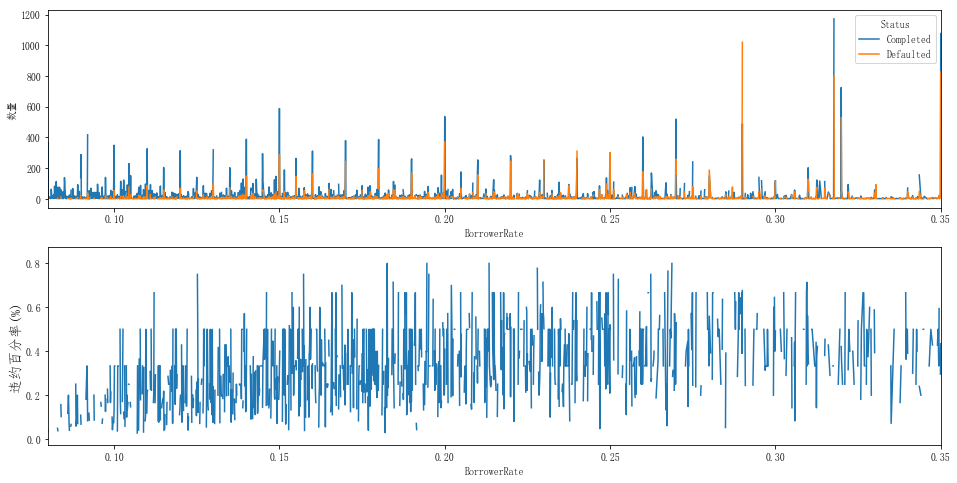

In [85]:
#borrowerrate明显相关，后来defaulted占得比例越来越高
loanData1=loanData[loanData['Status']!='Current']
borrowerrate=loanData1.groupby(['Status','BorrowerRate'])['BorrowerRate'].count().unstack(0)
print(borrowerrate)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
borrowerrate.plot(kind='line',ax=ax1)
ax1.set_ylabel('数量')
ax1.set_xlim([0.08,0.35])

defaultedrate=borrowerrate['Defaulted']/(borrowerrate['Defaulted']+borrowerrate['Completed'])
ax2=fig.add_subplot(212)
defaultedrate.plot(kind='line',ax=ax2)

ax2.set_ylabel('违约百分率(%)', fontsize=14)
ax2.set_xlim([0.08,0.35])
plt.show()

Status               Completed  Defaulted
IsBorrowerHomeowner                      
False                    20953       9405
True                     19393       7605


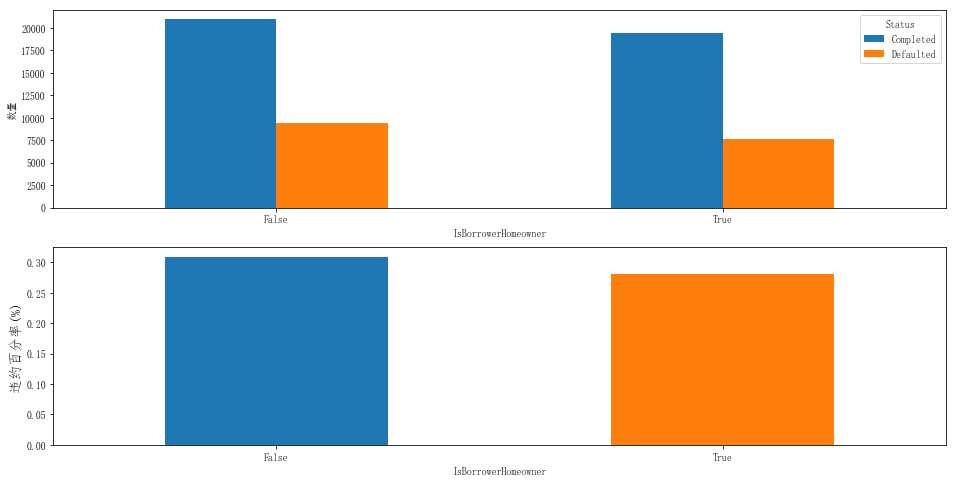

In [86]:
#是否有房子是相关的
loanData1=loanData[loanData['Status']!='Current']
isborrowerhomeowner=loanData1.groupby(['Status','IsBorrowerHomeowner'])['IsBorrowerHomeowner'].count().unstack(0)
print(isborrowerhomeowner)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
isborrowerhomeowner.plot(kind='bar',ax=ax1)
ax1.set_ylabel('数量')
ax1.set_xticklabels(['False','True'],rotation=0)

defaultedrate=isborrowerhomeowner['Defaulted']/(isborrowerhomeowner['Defaulted']+isborrowerhomeowner['Completed'])
ax2=fig.add_subplot(212)
defaultedrate.plot(kind='bar',ax=ax2)

ax2.set_ylabel('违约百分率(%)', fontsize=14)
ax2.set_xticklabels(['False','True'],rotation=0)
plt.show()


Status                     Completed  Defaulted
ListingCategory (numeric)                      
0                              10254       6695
1                              14413       4700
2                               2660        810
3                               3042       1409
4                               1620        775
5                                561        195
6                               1268        329
7                               4785       1491
8                                 33         13
9                                 27          3
10                                37         10
11                                66          6
12                                14          9
13                               449        226
14                               178         46
15                               313        131
16                                95          8
17                                17          1
18                               192    

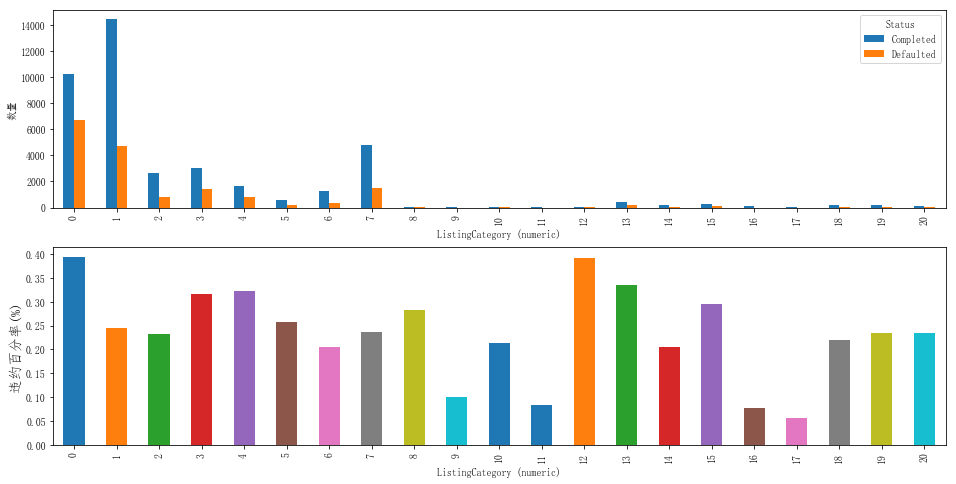

In [87]:
#和ListingCategory (numeric)相关
loanData1=loanData[loanData['Status']!='Current']
listingcategory=loanData1.groupby(['Status','ListingCategory (numeric)'])['ListingCategory (numeric)'].count().unstack(0)
print(listingcategory)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
listingcategory.plot(kind='bar',ax=ax1)
ax1.set_ylabel('数量')


defaultedrate=listingcategory['Defaulted']/(listingcategory['Defaulted']+listingcategory['Completed'])
ax2=fig.add_subplot(212)
defaultedrate.plot(kind='bar',ax=ax2)

ax2.set_ylabel('违约百分率(%)', fontsize=14)

plt.show()


Status                Completed  Defaulted
InquiriesLast6Months                      
0.0                     15750.0     4261.0
1.0                     10076.0     3626.0
2.0                      5590.0     2496.0
3.0                      3181.0     1680.0
4.0                      1853.0     1153.0
5.0                      1144.0      827.0
6.0                       692.0      631.0
7.0                       458.0      461.0
8.0                       314.0      332.0
9.0                       215.0      267.0
10.0                      154.0      196.0
11.0                      109.0      156.0
12.0                       75.0      126.0
13.0                       60.0      101.0
14.0                       47.0       80.0
15.0                       35.0       61.0
16.0                       27.0       52.0
17.0                       21.0       43.0
18.0                       20.0       33.0
19.0                       11.0       22.0
20.0                        5.0       25.0
21.0       

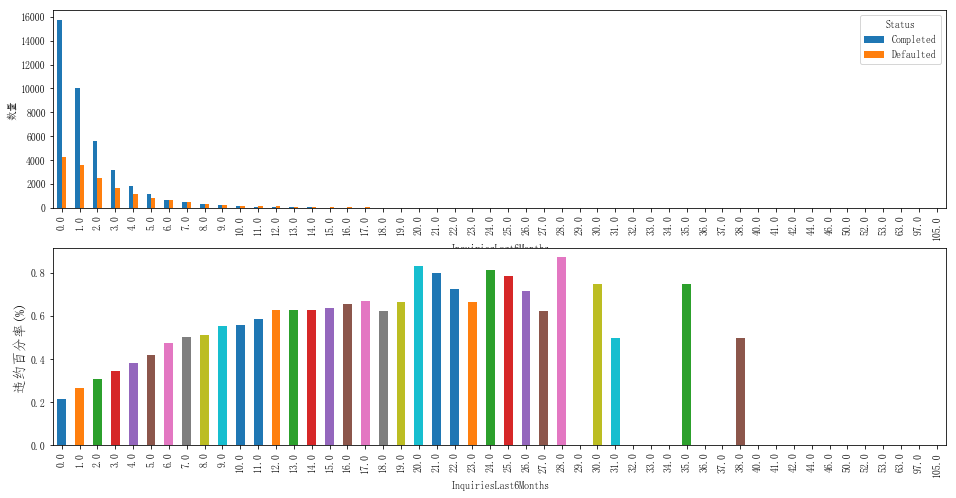

In [88]:
#和InquiriesLast6Months相关
loanData1=loanData[loanData['Status']!='Current']
inquirieslast6months=loanData1.groupby(['Status','InquiriesLast6Months'])['InquiriesLast6Months'].count().unstack(0)
print(inquirieslast6months)

fig=plt.figure()
fig.set_size_inches(16,8)
ax1=fig.add_subplot(211)
inquirieslast6months.plot(kind='bar',ax=ax1)
ax1.set_ylabel('数量')


defaultedrate=inquirieslast6months['Defaulted']/(inquirieslast6months['Defaulted']+inquirieslast6months['Completed'])
ax2=fig.add_subplot(212)
defaultedrate.plot(kind='bar',ax=ax2)

ax2.set_ylabel('违约百分率(%)', fontsize=14)

plt.show()


In [89]:

missing=pd.concat((loanData.isnull().any(),loanData.count()),axis=1)
missing.columns=['是否缺失','数量']
max=missing['数量'].max()
missing['缺失数量']=max-missing['数量']
missing['缺失率']=missing['缺失数量']/max
miss=missing[missing['缺失率']!=0]
miss

,是否缺失,数量,缺失数量,缺失率
CreditGrade,True,28948,84984,0.745919
ClosedDate,True,55084,58848,0.516519
BorrowerAPR,True,113907,25,0.000219
EstimatedEffectiveYield,True,84853,29079,0.255231
EstimatedLoss,True,84853,29079,0.255231
EstimatedReturn,True,84853,29079,0.255231
ProsperRating (numeric),True,84853,29079,0.255231
ProsperRating (Alpha),True,84853,29079,0.255231
ProsperScore,True,84853,29079,0.255231
BorrowerState,True,108420,5512,0.048380


In [90]:
loanData['CreditScore']=loanData['CreditScore'].fillna(loanData['CreditScore'].median())
import random
def randomuniform(s):
    if s>=0:
        d=s
    else:
        d=random.uniform(0.1,0.5)
    return d

loanData['DebtToIncomeRatio']=loanData['DebtToIncomeRatio'].apply(randomuniform)
loanData['DelinquenciesLast7Years']=loanData['DelinquenciesLast7Years'].fillna(1)
loanData['EmploymentStatusDuration']=loanData['EmploymentStatusDuration'].fillna(48)
def Loan_OriginationDate(s):
    if s>='2009-07-01':
        d='After Jul.2009'
    else:
        d='Before Jul.2009'
    return d

loanData['DataPhase']=loanData['LoanOriginationDate'].apply(Loan_OriginationDate)

missindex=loanData[(loanData['ProsperRating (Alpha)'].isnull())&(loanData['DataPhase']=='After Jul.2009')]
loanData[(loanData['DataPhase']=='After Jul.2009')]
#ProsperRating (Alpha)这个指标本身就是2009年以后用的.所以实际ProsperRating (Alpha)缺失144条，而09年之后有84997 ，144/84997=0.17%所占比例较小，所以采用直接删除的方式进行处理

loanData=loanData.drop(missindex.index,axis=0)
#不是中位数tianchong进去的，print(loanData['InquiriesLast6Months'].median())是1
loanData['InquiriesLast6Months'] = loanData['InquiriesLast6Months'].fillna(2)


In [91]:
def trans(df):
    # 填充空数据 和 把string数据转成integer表示
    #Status
    df.loc[df['Status']=='Completed','Status']=1
    df.loc[df['Status'] == 'Defaulted', 'Status'] = 0
    df.loc[df['Status'] == 'Current', 'Status'] = 2
    #IsBorrowerHomeowner
    df.loc[df['IsBorrowerHomeowner'] == False, 'IsBorrowerHomeowner'] = 0
    df.loc[df['IsBorrowerHomeowner'] == True, 'IsBorrowerHomeowner'] = 1
    #CreditGrade
    df.loc[df['CreditGrade'] == 'NC', 'CreditGrade'] = 0
    df.loc[df['CreditGrade'] == 'HR', 'CreditGrade'] = 1
    df.loc[df['CreditGrade'] == 'E', 'CreditGrade'] = 2
    df.loc[df['CreditGrade'] == 'D', 'CreditGrade'] = 3
    df.loc[df['CreditGrade'] == 'C', 'CreditGrade'] = 4
    df.loc[df['CreditGrade'] == 'B', 'CreditGrade'] = 5
    df.loc[df['CreditGrade'] == 'A', 'CreditGrade'] = 6
    df.loc[df['CreditGrade'] == 'AA', 'CreditGrade'] = 7
    #ProsperRating (Alpha)
    df.loc[df['ProsperRating (Alpha)'] == 'HR', 'ProsperRating (Alpha)'] = 1
    df.loc[df['ProsperRating (Alpha)'] == 'E', 'ProsperRating (Alpha)'] = 2
    df.loc[df['ProsperRating (Alpha)'] == 'D', 'ProsperRating (Alpha)'] = 3
    df.loc[df['ProsperRating (Alpha)'] == 'C', 'ProsperRating (Alpha)'] = 4
    df.loc[df['ProsperRating (Alpha)'] == 'B', 'ProsperRating (Alpha)'] = 5
    df.loc[df['ProsperRating (Alpha)'] == 'A', 'ProsperRating (Alpha)'] = 6
    df.loc[df['ProsperRating (Alpha)'] == 'AA', 'ProsperRating (Alpha)'] = 7
    #IncomeRange
    df.loc[df['IncomeRange'] == 'Not displayed', 'IncomeRange'] = 0
    df.loc[df['IncomeRange'] == 'Not employed', 'IncomeRange'] = 1
    df.loc[df['IncomeRange'] == '$0 ', 'IncomeRange'] = 2
    df.loc[df['IncomeRange'] == '$1-24,999', 'IncomeRange'] = 3
    df.loc[df['IncomeRange'] == '$25,000-49,999', 'IncomeRange'] = 4
    df.loc[df['IncomeRange'] == '$50,000-74,999', 'IncomeRange'] = 5
    df.loc[df['IncomeRange'] == '$75,000-99,999', 'IncomeRange'] = 6
    df.loc[df['IncomeRange'] == '$100,000+', 'IncomeRange'] = 7
    #BankCardUse
    df.loc[df['BankCardUse'] == 'No Use', 'BankCardUse'] = 0
    df.loc[df['BankCardUse'] == 'Mild Use', 'BankCardUse'] = 1
    df.loc[df['BankCardUse'] == 'Medium Use', 'BankCardUse'] = 2
    df.loc[df['BankCardUse'] == 'Heavy Use', 'BankCardUse'] = 3
    df.loc[df['BankCardUse'] == 'Super Use', 'BankCardUse'] = 4
    #CustomerClarify
    df.loc[df['CustomerClarify'] == 'New Borrower', 'CustomerClarify'] = 0
    df.loc[df['CustomerClarify'] == 'Previous Borrower', 'CustomerClarify'] = 1
    return df

loanData=trans(loanData)
loanData['ProsperRating (Alpha)']

0         NaN
1           6
2         NaN
3           6
4           3
5           5
6           2
7           4
8           7
9           7
10          4
11        NaN
12          5
13          6
14          6
15          1
16          2
17        NaN
18          6
19          3
20          5
21        NaN
22          1
23          3
24          4
25          2
26          2
27          6
28          4
29          6
         ... 
113907      1
113908      2
113909      4
113910      2
113911      3
113912      7
113913      6
113914    NaN
113915    NaN
113916      2
113917      2
113918    NaN
113919      3
113920      1
113921    NaN
113922    NaN
113923    NaN
113924      6
113925      2
113926    NaN
113927    NaN
113928      4
113929      2
113930      5
113931      5
113932      4
113933      6
113934      3
113935      4
113936      6
Name: ProsperRating (Alpha), Length: 113788, dtype: object

In [92]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
loanData_usemodel=loanData[loanData['Status']!=2]

before2009=loanData_usemodel[loanData_usemodel['DataPhase']=='Before Jul.2009']
X=before2009[['CreditScore','BankCardUse','IncomeRange','DebtToIncomeRatio','DelinquenciesLast7Years','EmploymentStatusDuration','CreditGrade','CustomerClarify','BorrowerRate','IsBorrowerHomeowner','ListingCategory (numeric)','InquiriesLast6Months']]
Y=before2009['Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
rfr=RandomForestClassifier()
rfr.fit(X_train,Y_train)
result=rfr.predict(X_test)
result
Y_test



110108    1
52349     0
11051     1
98957     1
70193     1
88705     0
112081    1
33935     1
109118    0
36898     1
108588    1
33751     1
20537     0
31572     0
110463    0
52411     1
1812      0
108335    1
84350     0
89165     1
2075      0
76219     1
83635     1
31812     1
97460     0
36585     0
92567     0
69258     1
7272      0
103667    0
         ..
72189     1
101608    0
33369     1
38688     1
97791     1
56027     0
53899     1
100372    0
90323     1
2966      0
35977     1
64996     0
83381     1
69588     1
57829     1
75955     1
33859     0
5829      1
64412     1
94685     1
38417     0
95640     1
13238     1
85606     1
87479     1
38070     1
93764     0
27001     0
16475     1
37727     1
Name: Status, Length: 8681, dtype: int64

In [93]:
def accracy(s,d):
    count=len(d)
    sum=0
    for i in range(0,count):
        if s[i]==d[i]:
            sum=sum+1
    percent=round(sum/count,4)
    return percent

percent=accracy(list(result),list(Y_test.values))
print(percent)
rfr.feature_importances_

0.6573


array([0.08066424, 0.03986157, 0.05185517, 0.16810994, 0.08501001,
       0.12374568, 0.04617645, 0.01122127, 0.23007459, 0.02019451,
       0.04327604, 0.09981053])

In [94]:
#用pd.Series是为了能用上后面的sort_values()。用pd.DataFrame不能用后面的
featureimportances1=pd.Series(rfr.feature_importances_,index=X.columns).sort_values(ascending=False)
featureimportances1

BorrowerRate                 0.230075
DebtToIncomeRatio            0.168110
EmploymentStatusDuration     0.123746
InquiriesLast6Months         0.099811
DelinquenciesLast7Years      0.085010
CreditScore                  0.080664
IncomeRange                  0.051855
CreditGrade                  0.046176
ListingCategory (numeric)    0.043276
BankCardUse                  0.039862
IsBorrowerHomeowner          0.020195
CustomerClarify              0.011221
dtype: float64

In [96]:
loanData_usemodel=loanData[loanData['Status']!=2]
after2009=loanData_usemodel[loanData_usemodel['DataPhase']=='After Jul.2009']
X=after2009[['CreditScore','BankCardUse','IncomeRange','DebtToIncomeRatio','DelinquenciesLast7Years','EmploymentStatusDuration','ProsperRating (Alpha)','CustomerClarify','BorrowerRate','IsBorrowerHomeowner','ListingCategory (numeric)','InquiriesLast6Months']]
Y=after2009['Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
rfr=RandomForestClassifier()
rfr.fit(X_train,Y_train)
result2=rfr.predict(X_test)
def accuracy2(rd,prd):
    count=len(prd)
    sum=0
    for i in range(0,count):
        if rd[i]==prd[i]:
            sum=sum+1
    pecent=round(sum/count,4)
    
    return pecent

percent2=accuracy2(list(Y_test.values),list(result2))
print(percent2)
featureimportances2=pd.Series(rfr.feature_importances_,index=X.columns).sort_values(ascending=False)

0.7408


In [98]:
loanData_usecurrent=loanData[loanData['Status']==2]
X_current=loanData_usecurrent[['CreditScore','BankCardUse','IncomeRange','DebtToIncomeRatio','DelinquenciesLast7Years','EmploymentStatusDuration','ProsperRating (Alpha)','CustomerClarify','BorrowerRate','IsBorrowerHomeowner','ListingCategory (numeric)','InquiriesLast6Months']]
currentpredict=rfr.predict(X_current)
loanData_usecurrent.loc[loanData_usecurrent['Status'].notnull(),'Status']=currentpredict
loanData_usecurrent.to_csv('D:/kaggle/prosper/currentpredicted.csv')
print(currentpredict)
completedRate=sum(currentpredict)/len(currentpredict)
print(completedRate)
defaultedRate=1-completedRate
print(defaultedRate)

D:\aaaaa\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[1 1 1 ... 1 1 1]
0.9329044117647058
0.06709558823529416
